<a href="https://colab.research.google.com/github/v5v5/trading/blob/main/trade_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

URL to download quotes EURUSD

https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=1262304000&period2=1619654400&interval=1d&events=history&includeAdjustedClose=true

In [ ]:
import pandas as pd
from urllib.request import Request, urlopen
from io import StringIO
import datetime
from dateutil.relativedelta import relativedelta
import time
import random
import math
import matplotlib.pyplot as plt

In [ ]:
# dt_from = datetime.date(2000,1,1)
# dt_from = datetime.date(2019,1,1)
# dt_from = datetime.date.today() + relativedelta(years=-1)
dt_from = datetime.date.today() + relativedelta(years=-2)
ut_from = str(int(time.mktime(dt_from.timetuple())))
ut_from

'1557964800'

In [ ]:
dt_to = datetime.date.today()
ut_to = str(int(time.mktime(dt_to.timetuple())))
ut_to

'1621123200'

In [ ]:
# url='https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=1262304000&period2=1619654400&interval=1d&events=history&includeAdjustedClose=true'
url='https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=' + ut_from + '&period2=' + ut_to + '&interval=1d&events=history&includeAdjustedClose=true'

In [ ]:
headers={'User-Agent': 'Mozilla/5.0'}

In [ ]:
req = Request(url, headers=headers)

In [ ]:
page = urlopen(req)
# page = urlopen(url)

In [ ]:
page = urlopen(url)

In [ ]:
content = page.read()

In [ ]:
text = content.decode('UTF-8')

In [ ]:
print(text[:300])

Date,Open,High,Low,Close,Adj Close,Volume
2019-05-16,1.120951,1.122435,1.117431,1.120724,1.120724,0
2019-05-17,1.117481,1.118443,1.115735,1.117356,1.117356,0
2019-05-20,1.116532,1.117701,1.115126,1.116532,1.116532,0
2019-05-21,1.116944,1.118318,1.114243,1.116857,1.116857,0
2019-05-22,null,null,null,


In [ ]:
data = StringIO(text)

In [ ]:
df1 = pd.read_csv(data, sep=',', header='infer')

In [ ]:
df1.tail(7)

,Date,Open,High,Low,Close,Adj Close,Volume
515,2021-05-06,1.200913,1.207001,1.199400,1.200797,1.200797,0.0
516,2021-05-07,1.206593,1.216545,1.205342,1.206855,1.206855,0.0
517,2021-05-10,1.216752,1.217730,1.213740,1.217108,1.217108,0.0
518,2021-05-11,1.214211,1.217968,1.212547,1.214093,1.214093,0.0
519,2021-05-12,1.214550,1.215067,1.206811,1.214450,1.214450,0.0
520,2021-05-13,1.207686,1.210654,1.205313,1.207851,1.207851,0.0
521,2021-05-14,1.208021,1.214772,1.207146,1.207729,1.207729,0.0


In [ ]:
# df1[df1['Open'].isna()]
len(df1[df1['Open'].isna()].index)

21

In [ ]:
df1.sort_values(by=['Date'], inplace=True)

In [ ]:
df1.dropna(inplace=True)
df1.reset_index(inplace=True)
df1

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-05-16,1.120951,1.122435,1.117431,1.120724,1.120724,0.0
1,1,2019-05-17,1.117481,1.118443,1.115735,1.117356,1.117356,0.0
2,2,2019-05-20,1.116532,1.117701,1.115126,1.116532,1.116532,0.0
3,3,2019-05-21,1.116944,1.118318,1.114243,1.116857,1.116857,0.0
4,5,2019-05-23,1.115511,1.117281,1.110951,1.115548,1.115548,0.0
...,...,...,...,...,...,...,...,...
496,517,2021-05-10,1.216752,1.217730,1.213740,1.217108,1.217108,0.0
497,518,2021-05-11,1.214211,1.217968,1.212547,1.214093,1.214093,0.0
498,519,2021-05-12,1.214550,1.215067,1.206811,1.214450,1.214450,0.0
499,520,2021-05-13,1.207686,1.210654,1.205313,1.207851,1.207851,0.0


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

In [ ]:
df1['DayOfWeek'] = df1['Date'].dt.dayofweek

In [ ]:
df1.tail(7)

,index,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek
494,515,2021-05-06,1.200913,1.207001,1.199400,1.200797,1.200797,0.0,3
495,516,2021-05-07,1.206593,1.216545,1.205342,1.206855,1.206855,0.0,4
496,517,2021-05-10,1.216752,1.217730,1.213740,1.217108,1.217108,0.0,0
497,518,2021-05-11,1.214211,1.217968,1.212547,1.214093,1.214093,0.0,1
498,519,2021-05-12,1.214550,1.215067,1.206811,1.214450,1.214450,0.0,2
499,520,2021-05-13,1.207686,1.210654,1.205313,1.207851,1.207851,0.0,3
500,521,2021-05-14,1.208021,1.214772,1.207146,1.207729,1.207729,0.0,4


In [ ]:
df2 = df1.drop(['High','Low', 'Adj Close', 'Volume'], axis=1)

In [ ]:
df2.tail(7)

,index,Date,Open,Close,DayOfWeek
494,515,2021-05-06,1.200913,1.200797,3
495,516,2021-05-07,1.206593,1.206855,4
496,517,2021-05-10,1.216752,1.217108,0
497,518,2021-05-11,1.214211,1.214093,1
498,519,2021-05-12,1.214550,1.214450,2
499,520,2021-05-13,1.207686,1.207851,3
500,521,2021-05-14,1.208021,1.207729,4


In [ ]:
df2['Close-1'] = df2['Close'].shift(1)
df2['Open-1'] = df2['Open'].shift(1)

In [ ]:
df2.tail(7)

,index,Date,Open,Close,DayOfWeek,Close-1,Open-1
494,515,2021-05-06,1.200913,1.200797,3,1.201504,1.201634
495,516,2021-05-07,1.206593,1.206855,4,1.200797,1.200913
496,517,2021-05-10,1.216752,1.217108,0,1.206855,1.206593
497,518,2021-05-11,1.214211,1.214093,1,1.217108,1.216752
498,519,2021-05-12,1.214550,1.214450,2,1.214093,1.214211
499,520,2021-05-13,1.207686,1.207851,3,1.214450,1.214550
500,521,2021-05-14,1.208021,1.207729,4,1.207851,1.207686


In [ ]:
df2['%Close'] = (df2['Close'] - df2['Close-1']) / df2['Close-1'] * 100
df2['%Open'] = (df2['Open'] - df2['Open-1']) / df2['Open-1'] * 100

In [ ]:
df2 = df2.drop(['Close','Close-1', '%Close'], axis=1)

In [ ]:
df2.head(7)

,index,Date,Open,DayOfWeek,Open-1,%Open
0,0,2019-05-16,1.120951,3,NaN,NaN
1,1,2019-05-17,1.117481,4,1.120951,-0.309559
2,2,2019-05-20,1.116532,0,1.117481,-0.084923
3,3,2019-05-21,1.116944,1,1.116532,0.036900
4,5,2019-05-23,1.115511,3,1.116944,-0.128296
5,6,2019-05-24,1.118381,4,1.115511,0.257281
6,7,2019-05-27,1.120636,0,1.118381,0.201631


In [ ]:
# take decision to buy or sell - if price = 1.167072 then buy = -1.167072 or sell = 1.167072
def take_decision(index):
  row = df2.loc[index]
  return random.choice([-row['Open'], +row['Open']])

In [ ]:
def is_guessed(index):
  if (index < 1):
    return True
  return (math.copysign(1, df2.loc[index]['%Open']) != math.copysign(1, df2.loc[index - 1]['decision']))

In [ ]:
def make_deal(index):
  k = df2.loc[index, 'k'] 
  decision = df2.loc[index, 'decision'] 
  return decision * (2 ** k)

In [ ]:
def discover_trend(index):
  if (index < 1):
    df2.loc[index, 'trend'] = 0
    return
  open_curr = df2.loc[index, '%Open']
  open_prev = df2.loc[index-1, '%Open']
  if (math.copysign(1, open_prev) == math.copysign(1, open_curr)):
    df2.loc[index, 'trend'] = df2.loc[index-1, 'trend'] + 1
  else:
    df2.loc[index, 'trend'] = 0

In [ ]:
# this is a main algorithm for trading
# !!! the algorithm is incorrect, needs to fix it
def trade():
  for index, row in df2.iterrows():
    # close previous deal
    if index < 1:
      df2.loc[index, 'result after close'] = 0
    else:
      # TODO incorrect algorithm
      df2.loc[index, 'result after close'] = df2.loc[index - 1, 'result after close'] + \
        df2.loc[index - 1, 'deal'] - \
        (2 ** df2.loc[index - 1, 'k']) * df2.loc[index, 'Open'] * math.copysign(1, df2.loc[index - 1]['deal'])

    # coefficient of deal depends on result of previous deal
    if (is_guessed(index)):
      k = 0
    else:
      k += 1
    df2.loc[index, 'k'] = k

    # take decision
    df2.loc[index, 'decision'] = take_decision(index)

    # make deal
    df2.loc[index, 'deal'] = make_deal(index)

    # open new deal
    if (index < 1):
      df2.loc[index, 'result'] = 0
    else:
      df2.loc[index, 'result'] = df2.loc[index, 'result after close'] + df2.loc[index, 'deal']
    
    # определяем тренд
    discover_trend(index)

In [ ]:
trade()

In [ ]:
df2.head(30)

,index,Date,Open,DayOfWeek,Open-1,%Open,result after close,k,decision,deal,result,trend
0,0,2019-05-16,1.120951,3,NaN,NaN,0.000000,0.0,-1.120951,-1.120951,0.000000,0.0
1,1,2019-05-17,1.117481,4,1.120951,-0.309559,-0.003470,1.0,-1.117481,-2.234962,-2.238432,0.0
2,2,2019-05-20,1.116532,0,1.117481,-0.084923,-0.005368,2.0,-1.116532,-4.466128,-4.471496,1.0
3,3,2019-05-21,1.116944,1,1.116532,0.036900,-0.003720,0.0,1.116944,1.116944,1.113224,0.0
4,5,2019-05-23,1.115511,3,1.116944,-0.128296,-0.002287,0.0,1.115511,1.115511,1.113224,0.0
5,6,2019-05-24,1.118381,4,1.115511,0.257281,-0.005157,1.0,1.118381,2.236762,2.231605,0.0
6,7,2019-05-27,1.120636,0,1.118381,0.201631,-0.009667,2.0,1.120636,4.482544,4.472877,1.0
7,8,2019-05-28,1.119357,1,1.120636,-0.114132,-0.004551,0.0,1.119357,1.119357,1.114806,0.0
8,9,2019-05-29,1.117069,2,1.119357,-0.204403,-0.002263,0.0,1.117069,1.117069,1.114806,1.0
9,10,2019-05-30,1.113834,3,1.117069,-0.289597,0.000972,0.0,-1.113834,-1.113834,-1.112862,2.0


In [ ]:
df2.describe()

,index,Open,DayOfWeek,Open-1,%Open,result after close,k,decision,deal,result,trend
count,501.000000,501.000000,501.000000,500.000000,500.000000,501.000000,501.00000,501.000000,501.000000,501.000000,501.000000
mean,267.676647,1.145884,2.003992,1.145760,0.015799,-0.135501,1.01996,0.028217,-0.605623,-0.738887,1.057884
std,149.688233,0.044914,1.418444,0.044873,0.409308,1.284938,1.45863,1.147561,64.814831,64.964838,1.385151
min,0.000000,1.065848,0.000000,1.065848,-2.603845,-5.835545,0.00000,-1.229861,-1240.415232,-1246.250777,0.000000
25%,146.000000,1.108906,1.000000,1.108826,-0.239276,-0.022223,0.00000,-1.123368,-2.169268,-1.699563,0.000000
50%,271.000000,1.127714,2.000000,1.127631,0.017797,0.602269,1.00000,1.080824,1.084011,-0.476541,1.000000
75%,396.000000,1.186437,3.000000,1.186088,0.265484,0.637917,2.00000,1.133414,1.226873,1.813466,2.000000
max,521.000000,1.233776,4.000000,1.233776,1.456985,0.856353,10.00000,1.233776,617.976832,614.372071,7.000000


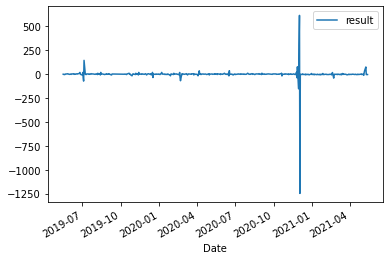

In [ ]:
df2.plot('Date', 'result')

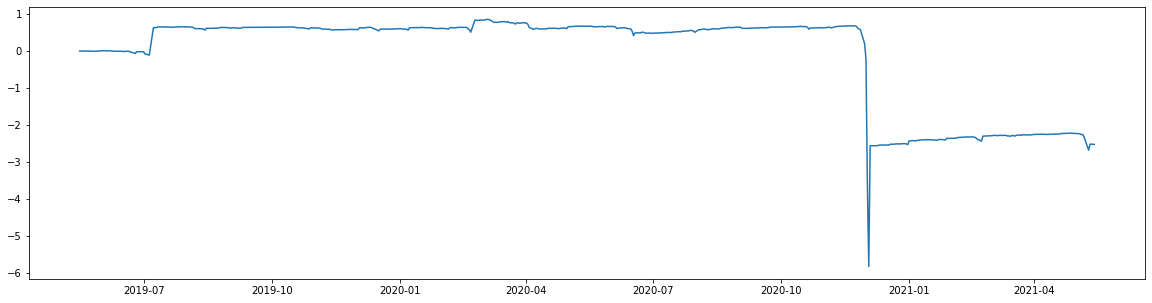

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df2['Date'], df2['result after close'])

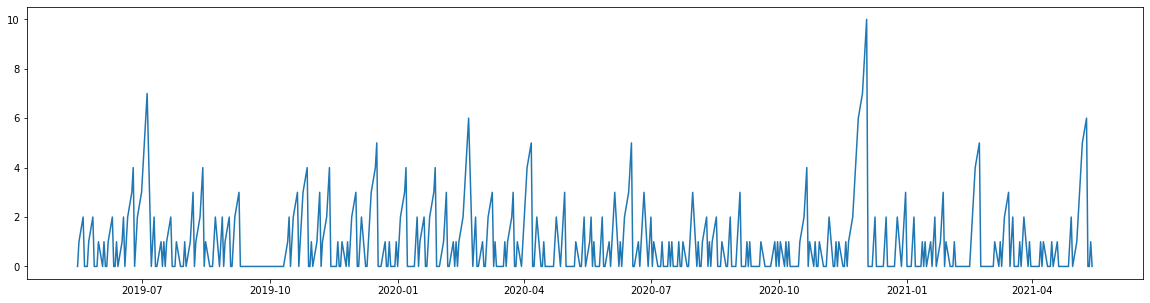

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df2['Date'], df2['k'])